<a href="https://colab.research.google.com/github/Nikassudani/MIT_MOVIE/blob/main/HP_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import zipfile
import os

In [5]:
 Unzip the uploaded file
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('harry_potter_data')
print("Files extracted successfully!")

Files extracted successfully!


In [7]:
 List the extracted files
files = os.listdir('harry_potter_data')
print("Extracted files:", files)

Extracted files: ['03 Harry Potter and the Prisoner of Azkaban.txt', '06 Harry Potter and the Half-Blood Prince.txt', '05 Harry Potter and the Order of the Phoenix.txt', '04 Harry Potter and the Goblet of Fire.txt', '07 Harry Potter and the Deathly Hallows.txt', '02 Harry Potter and the Chamber of Secrets.txt', '01 Harry Potter and the Sorcerers Stone.txt']


In [9]:
# Rename files to remove spaces or special characters
for filename in os.listdir('/content/harry_potter_data'):
    new_filename = filename.replace(" ", "_")
    os.rename(f'/content/harry_potter_data/{filename}', f'/content/harry_potter_data/{new_filename}')

In [11]:
# List renamed files
print("Renamed files:", os.listdir('/content/harry_potter_data'))

Renamed files: ['04_Harry_Potter_and_the_Goblet_of_Fire.txt', '03_Harry_Potter_and_the_Prisoner_of_Azkaban.txt', '06_Harry_Potter_and_the_Half-Blood_Prince.txt', '05_Harry_Potter_and_the_Order_of_the_Phoenix.txt', '02_Harry_Potter_and_the_Chamber_of_Secrets.txt', '01_Harry_Potter_and_the_Sorcerers_Stone.txt', '07_Harry_Potter_and_the_Deathly_Hallows.txt']


In [13]:
# Step 2: Load the text data from the correct path
file_path = '/content/harry_potter_data/01_Harry_Potter_and_the_Sorcerers_Stone.txt'

with open(file_path, 'r', encoding='utf-8') as f:
    data = f.read()

print("First 500 characters of the file:")
print(data[:500])




First 500 characters of the file:
M r. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.

Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amoun


In [14]:
!pip install nltk

# Import necessary libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Step 1: Tokenize the text into words
tokens = word_tokenize(data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
#: Remove punctuation and convert to lowercase
tokens = [word.lower() for word in tokens if word.isalnum()]


In [22]:
#: Remove stopwords (common words that don't carry much meaning)
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]


In [24]:
# Display the first 20 filtered tokens
print("First 20 filtered tokens:")
print(filtered_tokens[:20])



from collections import Counter

First 20 filtered tokens:
['dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', 'expect', 'involved', 'anything', 'strange', 'mysterious', 'hold', 'nonsense']


In [26]:

# Calculate word frequencies
word_counts = Counter(filtered_tokens)

# Display the 10 most common words
print("\nTop 10 most common words:")
print(word_counts.most_common(10))




Top 10 most common words:
[('harry', 1332), ('said', 794), ('ron', 425), ('hagrid', 370), ('hermione', 268), ('back', 254), ('one', 250), ('got', 206), ('could', 197), ('like', 193)]


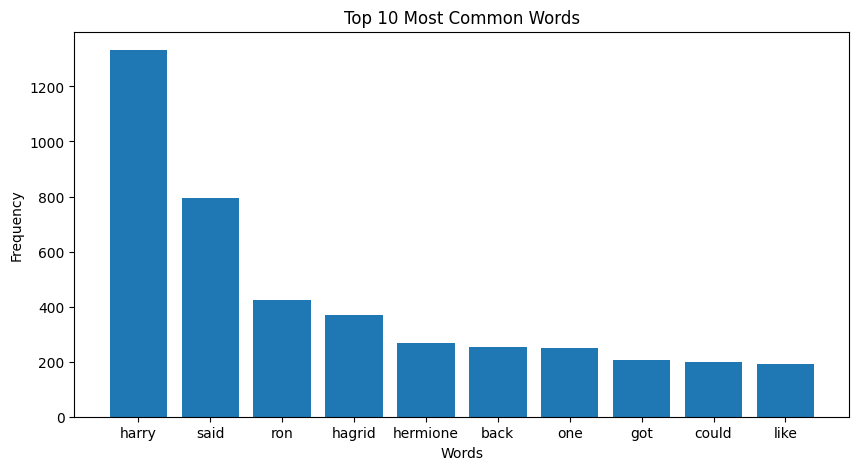

In [28]:


import matplotlib.pyplot as plt

# Extract the top 10 most common words and their counts
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

# Plot the word frequencies
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()



In [30]:

# Install TextBlob if it's not already installed
!pip install textblob

# Import necessary libraries
from textblob import TextBlob




blob = TextBlob(data)

# Calculate sentiment
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

# Display the results
print(f"Polarity: {polarity}")  # -1 to 1 (negative to positive)
print(f"Subjectivity: {subjectivity}")  # 0 to 1 (factual to opinionated)




# Split the text into sentences and analyze each one
sentences = blob.sentences

# Display sentiment of the first 5 sentences
for i, sentence in enumerate(sentences[:9]):
    print(f"\nSentence {i+1}: {sentence}")
    print(f"Polarity: {sentence.sentiment.polarity}, Subjectivity: {sentence.sentiment.subjectivity}")



Polarity: 0.0502303784673865
Subjectivity: 0.4755197154138343

Sentence 1: M r. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much.
Polarity: 0.4033333333333333, Subjectivity: 0.6366666666666666

Sentence 2: They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.
Polarity: -0.0125, Subjectivity: 0.4291666666666667

Sentence 3: Mr. Dursley was the director of a firm called Grunnings, which made drills.
Polarity: -0.2, Subjectivity: 0.4

Sentence 4: He was a big, beefy man with hardly any neck, although he did have a very large mustache.
Polarity: 0.04672619047619048, Subjectivity: 0.524702380952381

Sentence 5: Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors.
Polarity: -0.008571428571428572, Subjec

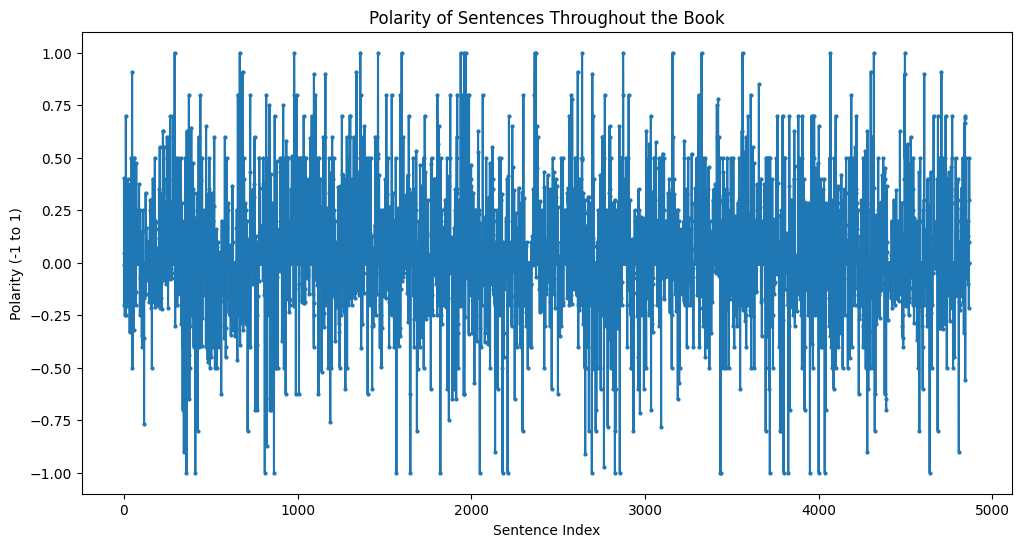

In [31]:
# Collect polarity scores for each sentence
polarity_scores = [sentence.sentiment.polarity for sentence in sentences]

# Plot the polarity scores
plt.figure(figsize=(12, 6))
plt.plot(polarity_scores, marker='o', linestyle='-', markersize=2)
plt.title('Polarity of Sentences Throughout the Book')
plt.xlabel('Sentence Index')
plt.ylabel('Polarity (-1 to 1)')
plt.show()